In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/5
235/235 [==============================] - 1s 2ms/step - loss: 0.6941 - val_loss: 0.6940
Epoch 2/5
235/235 [==============================] - 1s 2ms/step - loss: 0.6939 - val_loss: 0.6939
Epoch 3/5
235/235 [==============================] - 1s 2ms/step - loss: 0.6938 - val_loss: 0.6938
Epoch 4/5
235/235 [==============================] - 1s 2ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 5/5
235/235 [==============================] - 1s 2ms/step - loss: 0.6936 - val_loss: 0.6935


In [2]:
#Adding Hidden Layer
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(128, activation='relu')(input_img)  # First hidden layer
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Encoded layer

# "decoded" is the lossy reconstruction of the input
decoded = Dense(128, activation='relu')(encoded)  # Additional hidden layer
decoded = Dense(784, activation='sigmoid')(decoded)  # Output layer

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load the fashion_mnist dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/5
235/235 [==============================] - 1s 3ms/step - loss: 0.6948 - val_loss: 0.6947
Epoch 2/5
235/235 [==============================] - 1s 3ms/step - loss: 0.6946 - val_loss: 0.6945
Epoch 3/5
235/235 [==============================] - 1s 3ms/step - loss: 0.6944 - val_loss: 0.6944
Epoch 4/5
235/235 [==============================] - 1s 3ms/step - loss: 0.6943 - val_loss: 0.6942
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6942 - val_loss: 0.6941


313/313 [==============================] - 0s 410us/step


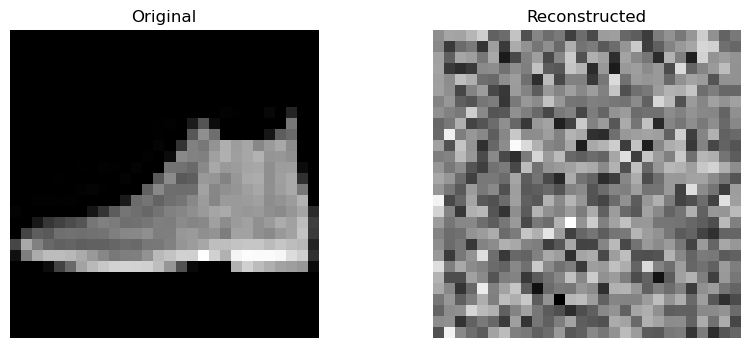

In [5]:
# Predict the test data
decoded_imgs = autoencoder.predict(x_test)

# Choose an image to visualize
n = 0  # for example, the first image in the test set

import matplotlib.pyplot as plt
# Visualize the original image
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(x_test[n].reshape(28, 28), cmap='gray')
plt.title('Original')
plt.axis('off')

# Visualize the reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(decoded_imgs[n].reshape(28, 28), cmap='gray')
plt.title('Reconstructed')
plt.axis('off')

plt.show()

Epoch 1/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6939 - val_loss: 0.6938
Epoch 2/5
235/235 [==============================] - 1s 3ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 3/5
235/235 [==============================] - 1s 3ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 4/5
235/235 [==============================] - 1s 3ms/step - loss: 0.6934 - val_loss: 0.6934
Epoch 5/5
235/235 [==============================] - 1s 3ms/step - loss: 0.6933 - val_loss: 0.6932


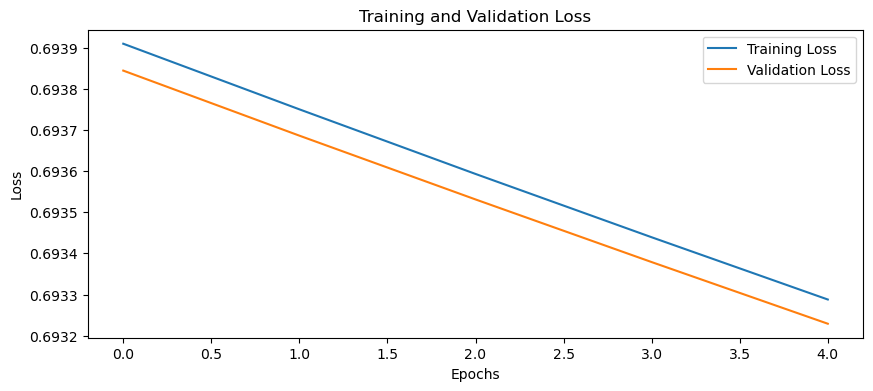

In [6]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Define the autoencoder structure
input_img = Input(shape=(784,))
encoding_dim = 32
encoded = Dense(128, activation='relu')(input_img)  # First hidden layer
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Encoded layer

decoded = Dense(128, activation='relu')(encoded)  # Additional hidden layer
decoded = Dense(784, activation='sigmoid')(decoded)  # Output layer

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load and preprocess the data
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the model and save the history
history = autoencoder.fit(x_train, x_train,
                          epochs=5,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Plot the training and validation loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
